In [1]:
%run flow_tools.py

/opt/homebrew/Caskroom/miniforge/base/envs/flow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
df = pd.concat([pd.read_csv('4oht_dose.csv'), pd.read_csv('aba_gzv.csv')])

In [26]:
for drug, dose in zip(['4OHT', 'ABA', 'GZV'], ['100nM','1mM','1µM']):
    baseline = df[df.Drug.isin([drug]) & df.Dose.isin(['Untreated'])]['BV 421-A'].mean()
    filters = df.Drug.isin([drug]) & df.Dose.isin([dose])
    df.loc[filters, 'BV 421-A'] = df.loc[filters, 'BV 421-A']/baseline

In [22]:
list(zip(['4OHT', 'ABA', 'GZV'], ['100nM','1mM','1µM']))

[('4OHT', '100nM'), ('ABA', '1mM'), ('GZV', '1µM')]

In [27]:
filters = (((df.Drug == '4OHT') & (df.Dose == '100nM')) |
           ((df.Drug == 'ABA') & (df.Dose == '1mM')) |
           ((df.Drug == 'GZV') & (df.Dose == '1µM')))

summary_df = (df[filters]
              .groupby(['Drug', 'Replicate'])['BV 421-A']
              .mean()
              .reset_index())

In [36]:
summary_df['LFC'] = np.log10(summary_df['BV 421-A'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


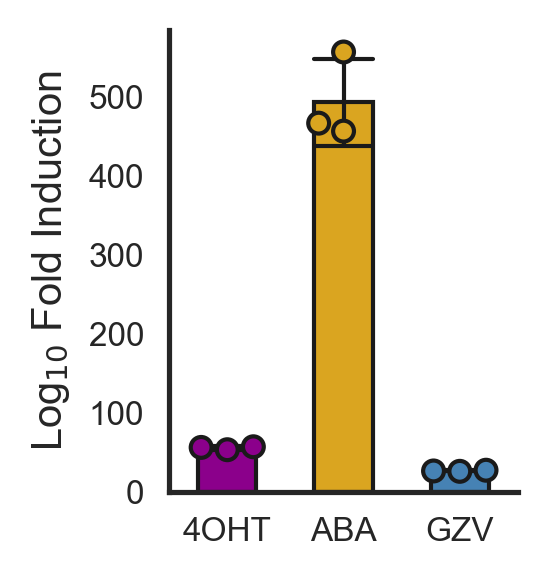

In [43]:
with sns.color_palette(['darkmagenta', 'goldenrod', 'steelblue']):
    fig, ax = plt.subplots(1,1,figsize=(1.5,2), dpi=300)
    g = sns.swarmplot(data=summary_df, x='Drug', y='BV 421-A', hue='Drug',
                  order=['4OHT','ABA','GZV'],
                  hue_order=['4OHT','ABA','GZV'], 
                  edgecolor='k', linewidth=1, dodge=False, legend=False)
    sns.barplot(data=summary_df, x='Drug', y='BV 421-A', hue='Drug',
                  order=['4OHT','ABA','GZV'],
                  hue_order=['4OHT','ABA','GZV'],
            dodge=False, edgecolor='k', capsize=0.5, width=0.5, saturation=1,
                estimator='mean', errorbar='sd',
            err_kws={'linewidth': 1, 'color':'k'})
    #g.legend().remove()
    plt.legend(frameon=False)
    g.set_ylabel(r'Log$_{10}$ Fold Induction')
    g.set_xlabel('')
    #plt.xticks(rotation=0, ha='right')
    sns.despine()
    #plt.savefig(outputdir+'induction.pdf', bbox_inches='tight')